# Which GPU to use

In [1]:
multiGPU = False
whichGPU = 1
 
# Select which GPU to use
if(multiGPU):
    from keras.utils.training_utils import multi_gpu_model
else:
    import os
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    # The GPU id to use, usually either "0" or "1"
    os.environ["CUDA_VISIBLE_DEVICES"] = str(whichGPU)
    
# # Do other imports now...

# Load all the functions

In [2]:
%run -i 'arena.py'

Using TensorFlow backend.


In [3]:
# %load_ext autoreload
# %autoreload 1
# %aimport arena
# %reload_ext autoreload

# TRAINING TEMPLATE CODE


In [2]:
%reload_ext autoreload
##### TRAINING TEMPLATE CODE

##############################
#
#    PARAMETERS 
#
##############################
import math

# Experiment description
expDescr = "Experiment description text"

# What data to use
tableBase = '4PpKk'
convertStates = False
fractionOfDataToUse = 1 # [0,1]

# Interactive (just in general if one is asked for confirmations, set to False if on autopilot over night f.x.)
askForConfirmation = True

# Transfer Learning
loadWeights = False 
weightsSource = '024'
loadCheckpointWeights = False

# Plot during training
plotDuringTraining = True
compareResultsDuringTraining = False
compareWith = '013' # orginal net structure, trained from random on 4pc dataset


# NN parameters
# filters = [8,16,16,32,32]    #016:0.913  10kpm 2048:30                  8192:23:38% 32768:17:52% 
# filters = [8,16,32,64,128]   #005:0.952  50kpm 2048:37s    4096:28:50% 
# filters = [8,32,64,128,256]  #013:0.968 188kpm 2048:50s    4096:40s:61%             32768:46s:80% 65536:42s:99% 
# filters = [32,64,128,160,256]#014:0.974 388kpm 2048:3m:91% 
# filters = [16,32,64,128,128,128]#035:0.975 191kpm 2048:45s:50%/50% 2048:68s:78% 
# filters = [16,16,32,32,64,64,128] #054 70kpm
# filters = [16,16,32,32,64,64,128] #054 70kpm
filters = [16,32,32,64,128,128,128]
filterShape = [2,2,2,2,2,2,2]
batch_size = 256
epochs = 150
multiGPU = False
whichGPU = 0
# optimizer = 'Adam'
optimizer = 'Adadelta'
useBatchNorm = False

# Other paramters
confirmDirOverwrite = False
tPrintInterval = 0.5 # for print progress
yieldSize = 10000 # for load generator

### NO NEED TO MODIFY BELOW ###
# Generate dataset variables
fileName = tableBase + '.hdf5'
dataSetName = tableBase + '_onlyLegal'
if not convertStates: 
    dataSetName = tableBase + '_onlyLegal_fullStates'
dataSetWdlName = tableBase + '_Wdl_onlyLegal_3Values'

# Number of Pieces
nPi =  int(dataSetName[0])
nPa = nPi - 2
nWPa = math.ceil(nPa/2)

# Select which GPU to use
# if(multiGPU):
#     from keras.utils.training_utils import multi_gpu_model
# else:
#     import os
#     os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#     # The GPU id to use, usually either "0" or "1"
#     os.environ["CUDA_VISIBLE_DEVICES"] = str(whichGPU)
    
# Other NN stuff
num_classes = 3
input_shape = (4,8,8)


In [5]:
# Train, evaluate and save 
# %reload_ext autoreload
model, nnStr = createModel()
# resID = genNextResultsDir(model)
# X_train, X_test, y_train, y_test = loadData()
# score = calcScoreBigData(model)
# score = calcScore(model)
# saveTrainResults(resID, model, logDir, score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 7, 7)          272       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 6, 32)         928       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 5, 32)         4128      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 4, 64)         8256      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 3, 128)        32896     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 2, 128)        65664     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 1, 128)        65664     
__________

### many batches

In [ ]:
# Train and save with different paramters
X_train, X_test, y_train, y_test = loadData()

bs = [256,256,256,512,512,512,1024,1024,1024]

for batch_size in bs:
    expDescr = "Testing batch size effect for 70kpm network (7 CNN layers) {}bs".format(batch_size) 
    print("---------------------- batch size ", batch_size, '-------------------------------')
    model, nnStr = createModel()
    resID = genNextResultsDir(model)
    fitHistory, logDir = trainModel(resID, model)
    score = calcScore(model)
    saveTrainResults(resID, model, logDir)

# Bengio Template Code

In [19]:
### OUTDATED       






# 3n4 noFreeze
%run -i 'arena.py'

# Parameters
sourceNet = '103'
freeze = False
epochs = 20
resSaveFile = '3n4plus'

fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False
saveDir = 'bengioResults'

X_train, X_test, y_train, y_test = loadData()
model, nnStr = createModel()
results = []
currentAverage = 0
averageOver = 
layersCount = len(model.layers)

for copyFirstNLayers in range(layersCount + 1):
    if copyFirstNLayers != layersCount - 1:
        model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

        resID = genNextResultsDir(model)
        #add freeze and some tl parameters to save dir

        # train
        fitHistory, logDir = trainModel(resID, model)

        # score and save accuracy
        score = calcScore(model)
        saveTrainResults(resID, model, logDir, score, copyFirstNLayers)
        results.append(score[1])

        # save results incrementally to txt file
        save_obj(bengioResults, resSaveFile, results)
        with open(bengioResults + '/' + str(resSaveFile) + '.txt','w') as file:
            file.write(str(results))
            
        # to load:
        # results = load_obj('temp','3n4.txt')
print(results)

X_train shape: (4982178, 4, 8, 8)
y_train shape: (4982178, 1)
X_test shape: (2453910, 4, 8, 8)
y_test shape: (2453910, 1)
4982178 train samples
2453910 test samples
Done loading dataset
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 16, 7, 7)          272       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 6, 32)         928       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 5, 32)         4128      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 4, 64)         8256      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 3, 128)        32896     
_________________________________________________________________
conv2d_48 (Conv2D)    

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

# Plot bengio results

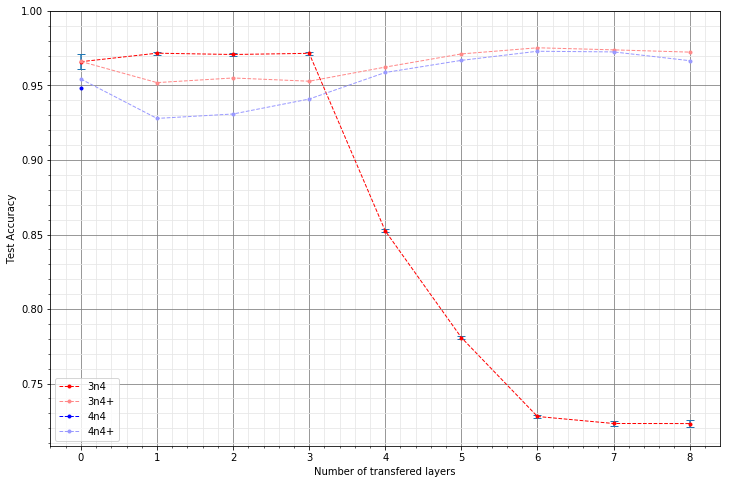

In [10]:
# plot Bengio 

######### load results
saveDir = 'bengioResults'

#3n4
resSaveFile = '3n4freeze-10runAverage'
acc3n4 = load_obj(saveDir,resSaveFile)
acc3n4err = [0.005,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.0022]

#3n4+
resSaveFile = '3n4nofreeze-10runAverage'
saveDir = 'bengioResults'
acc3n4plus = load_obj(saveDir,resSaveFile)

#4n4
resSaveFile = '4n4freeze-5runAverage'
acc4n4 = load_obj(saveDir,resSaveFile)
# acc3n4err = [0.005,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.0022]

#4n4+
# resSaveFile = '4n4nofreeze-10runAverage'
resSaveFile = '4n4nofreeze-5runAverage'
saveDir = 'bengioResults'
acc4n4plus = load_obj(saveDir,resSaveFile)


######### plot results
AnB = acc3n4
AnBplus = acc3n4plus
BnB = acc4n4
BnBplus = acc4n4plus

x = [i for i in range(len(AnB))]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
# ax.set_yscale('log')

#3n4
ax.errorbar(x,AnB, acc3n4err, fmt='none', capsize = 4)
ax.plot(x,AnB, '.--', label = '3n4', color = '#ff0000', linewidth = 1)


#3n4+
# ax.errorbar(x,AnBplus, yerr=0.005, fmt='none', capsize = 4)
ax.plot(x,AnBplus, '.--', label = '3n4+', color = '#ff8888', linewidth = 1)

#4n4
# ax.errorbar(x,AnB, acc3n4err, fmt='none', capsize = 4)
ax.plot(x[:len(BnB)],BnB, '.--', label = '4n4', color = '#0000ff', linewidth = 1)

#4n4+
# ax.errorbar(x,AnB, acc3n4err, fmt='none', capsize = 4)
ax.plot(x[:len(BnBplus)],BnBplus, '.--', label = '4n4+', color = '#9999ff', linewidth = 1)

#setup
yl = ax.get_ylim()
ax.set_ylim(yl[0], 1)
ax.set_xlabel("Number of transfered layers")
ax.set_ylabel("Test Accuracy")
ax.legend()
plt.minorticks_on()
ax.grid(b=True, which='major', color='0.5', linestyle='-')
ax.grid(b=True, which='minor', color='0.9', linestyle='-')
                

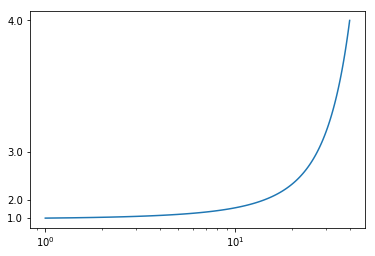

In [30]:
import matplotlib.pyplot as plt

import numpy as np

x = np.linspace(1, 40, 100);
y = np.linspace(1, 4, 100);

# Actually plot the exponential values
plt.plot(x, np.e**y)
ax = plt.gca()

# Set x logaritmic
ax.set_xscale('log')

# Rewrite the y labels
y_labels = np.linspace(min(y), max(y), 4)
ax.set_yticks(np.e**y_labels)
ax.set_yticklabels(y_labels)

plt.show()

# Calc Bengio-ish TL and average

X_train shape: (4982178, 4, 8, 8)
y_train shape: (4982178, 1)
X_test shape: (2453910, 4, 8, 8)
y_test shape: (2453910, 1)
4982178 train samples
2453910 test samples
Done loading dataset
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 16, 7, 7)          272       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 6, 32)         928       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 5, 32)         4128      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 4, 64)         8256      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 3, 128)        32896     
_________________________________________________________________
conv2d_48 (Conv2D)    

/home/frimann/anaconda3/envs/endnetGpu/lib/python3.5/site-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 176s 35us/step - loss: 0.2878 - acc: 0.8765 - val_loss: 0.1988 - val_acc: 0.9160

Epoch 00001: val_acc improved from -inf to 0.91602, saving model to Results/392/weightsCheckpoints/weights-checkp-001-0.916.hdf5
Epoch 2/10
4982178/4982178 [==============================] - 163s 33us/step - loss: 0.1724 - acc: 0.9283 - val_loss: 0.1556 - val_acc: 0.9355

Epoch 00002: val_acc improved from 0.91602 to 0.93549, saving model to Results/392/weightsCheckpoints/weights-checkp-002-0.935.hdf5
Epoch 3/10
4982178/4982178 [==============================] - 163s 33us/step - loss: 0.1413 - acc: 0.9420 - val_loss: 0.1431 - val_acc: 0.9414

Epoch 00003: val_acc improved from 0.93549 to 0.94145, saving model to Results/392/weightsCheckpoints/weights-checkp-003-0.941.hdf5
Epoch 4/10
4982178/4982178 [==============================] - 163s 33us/step - loss: 0.1233 - acc: 0.9500 - val_loss: 0.1

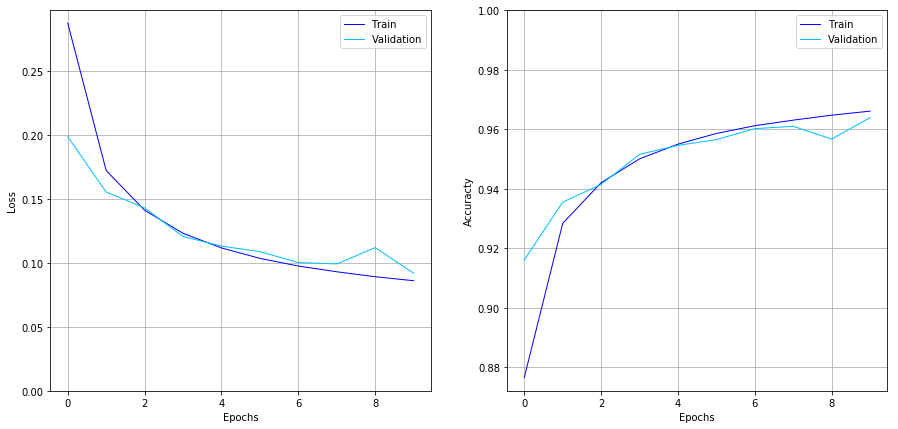

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 0 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 1: <keras.layers.convolutional.Conv2D object at 0x7fbca29f2eb8>
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/394/
Creating save dir
Done generating results dir Results/394/
Saving weights to Results/394/weightsChec

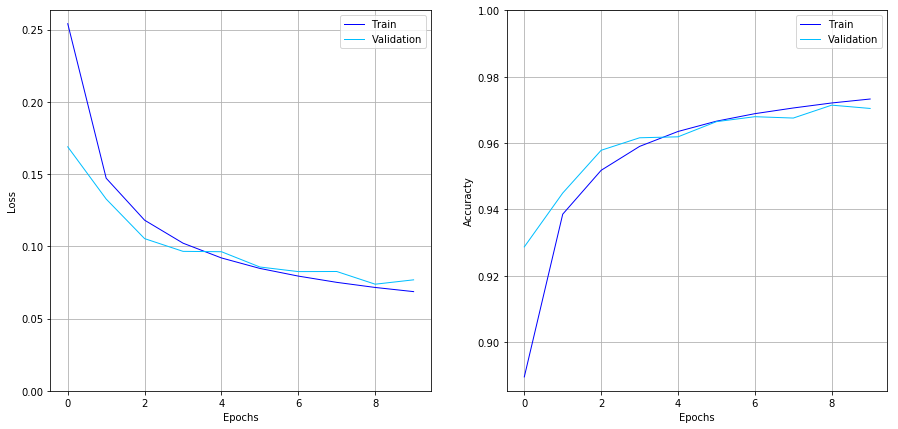

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 0 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 1: <keras.layers.convolutional.Conv2D object at 0x7fbca29f2eb8>
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/396/
Creating save dir
Done generating results dir Results/396/
Saving weights to Results/396/weightsChec

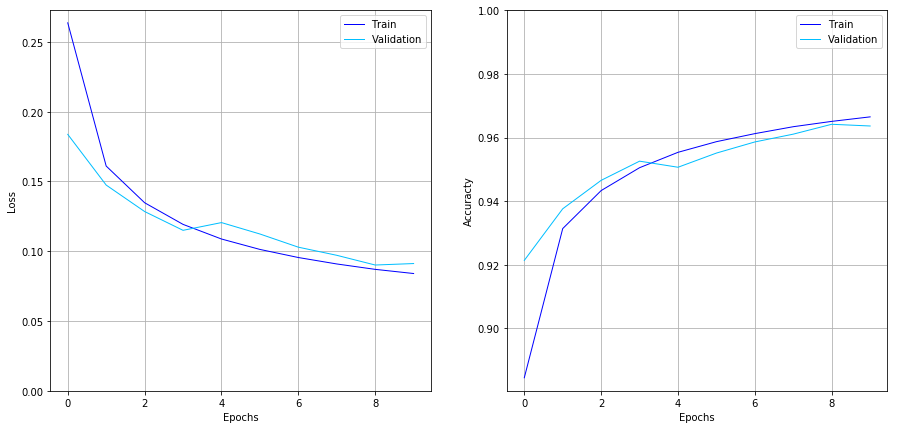

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 0 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 1: <keras.layers.convolutional.Conv2D object at 0x7fbca29f2eb8>
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/398/
Creating save dir
Done generating results dir Results/398/
Saving weights to Results/398/weightsChec

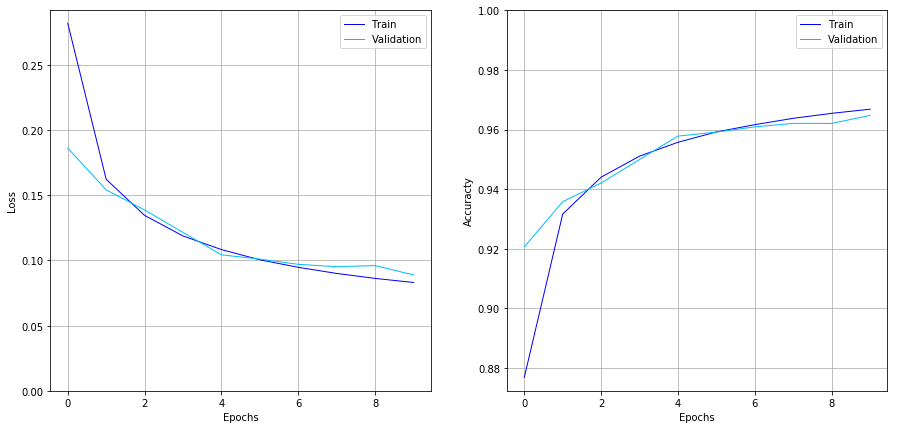

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 0 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 1: <keras.layers.convolutional.Conv2D object at 0x7fbca29f2eb8>
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/400/
Creating save dir
Done generating results dir Results/400/
Saving weights to Results/400/weightsChec

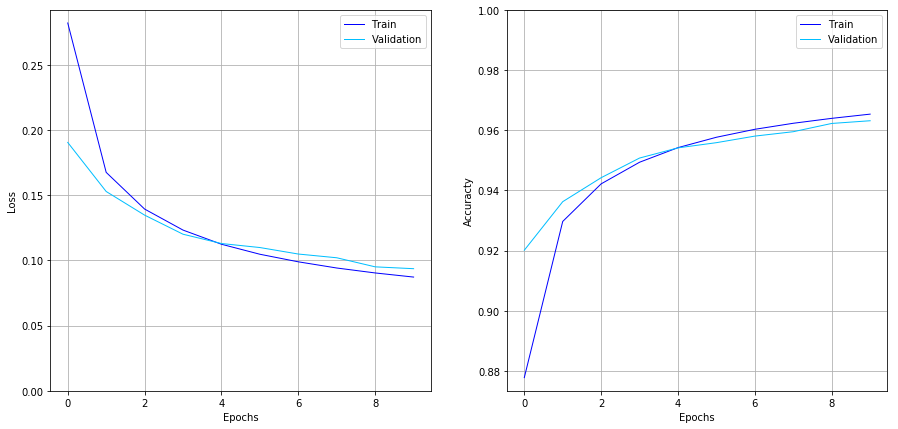

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 0 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 1: <keras.layers.convolutional.Conv2D object at 0x7fbca29f2eb8>
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/402/
Creating save dir
Done generating results dir Results/402/
Saving weights to Results/402/weightsChec

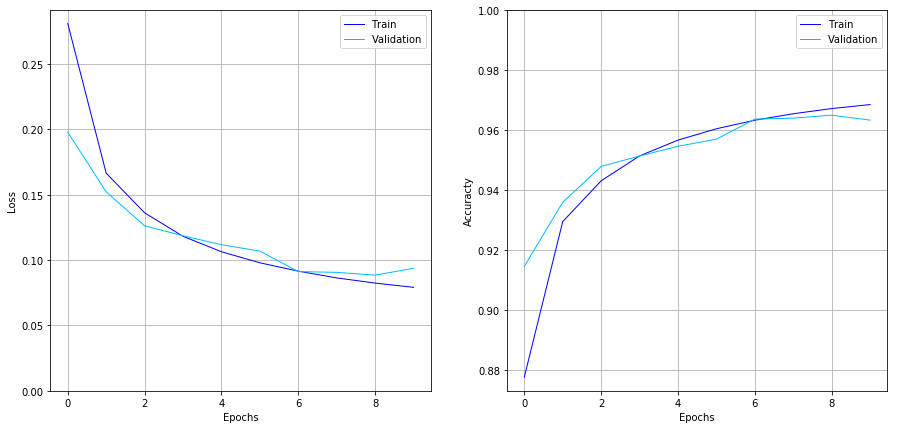

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 0 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 1: <keras.layers.convolutional.Conv2D object at 0x7fbca29f2eb8>
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/404/
Creating save dir
Done generating results dir Results/404/
Saving weights to Results/404/weightsChec

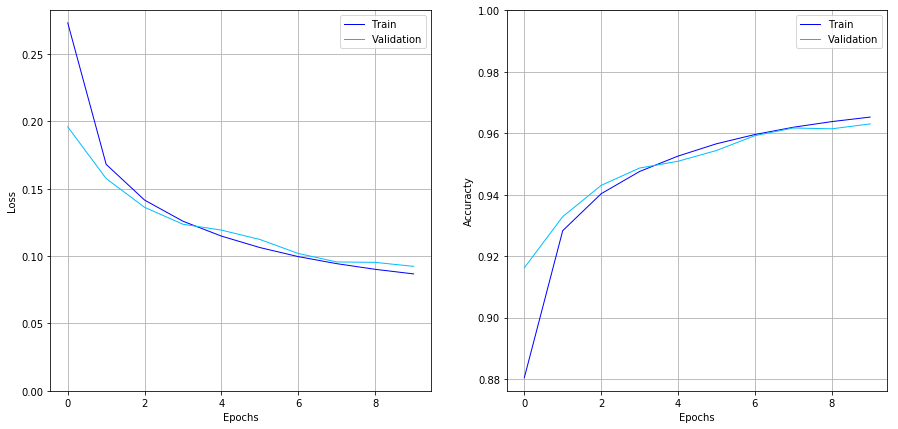

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 0 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 1: <keras.layers.convolutional.Conv2D object at 0x7fbca29f2eb8>
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/406/
Creating save dir
Done generating results dir Results/406/
Saving weights to Results/406/weightsChec

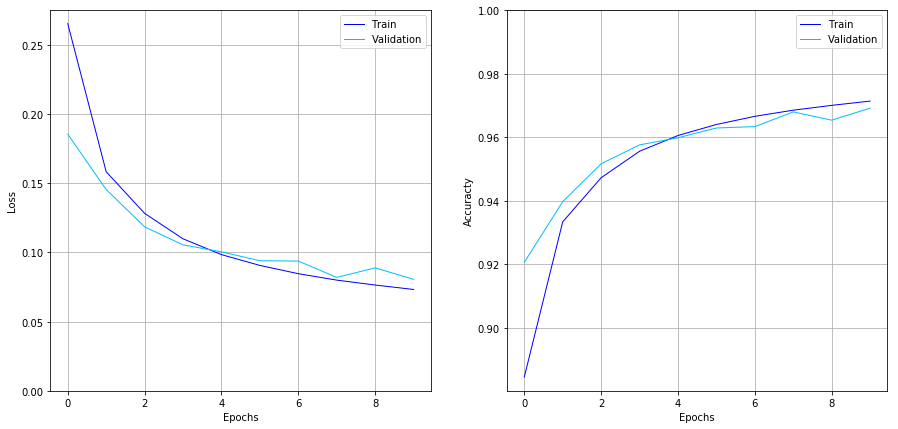

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 0 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 1: <keras.layers.convolutional.Conv2D object at 0x7fbca29f2eb8>
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/408/
Creating save dir
Done generating results dir Results/408/
Saving weights to Results/408/weightsChec

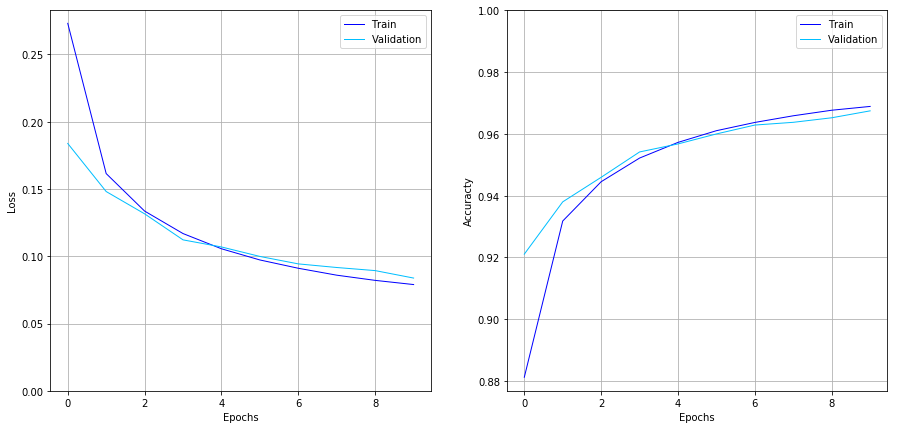

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 0 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 1: <keras.layers.convolutional.Conv2D object at 0x7fbca29f2eb8>
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/410/
Creating save dir
Done generating results dir Results/410/
Saving weights to Results/410/weightsChec

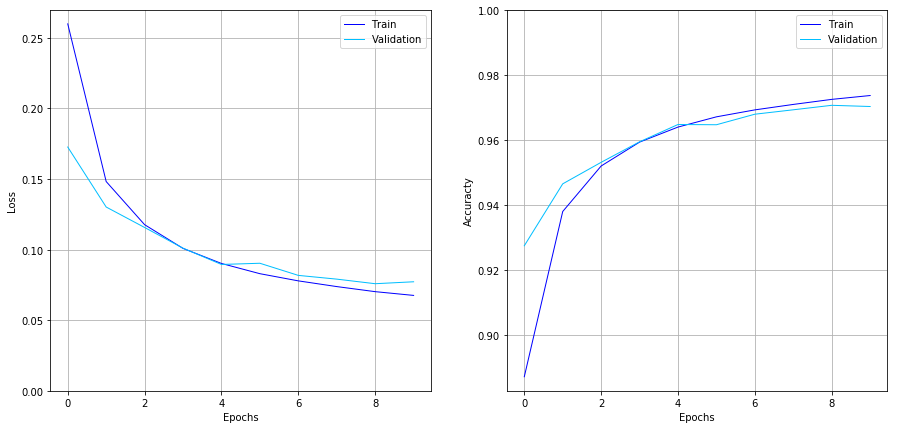

Saving summary...
Saving tensorboard logs...
All done saving stuff!
=========== At layer 1 of 8 ===========
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/412/
Creating save dir
Done generating results dir Results/412/
Saving weights to Results/412/weightsCheckpoints/
Train on 4982178 samples, validate o

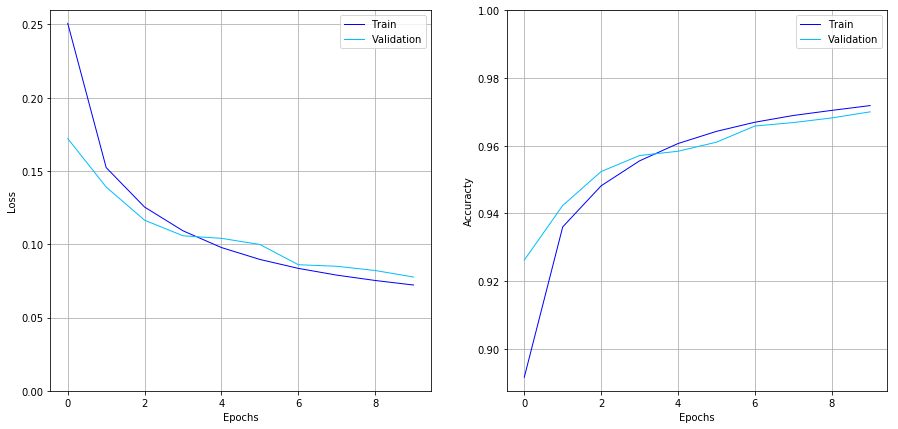

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/414/
Creating save dir
Done generating results dir Results/414/
Saving weights to Results/414/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/498

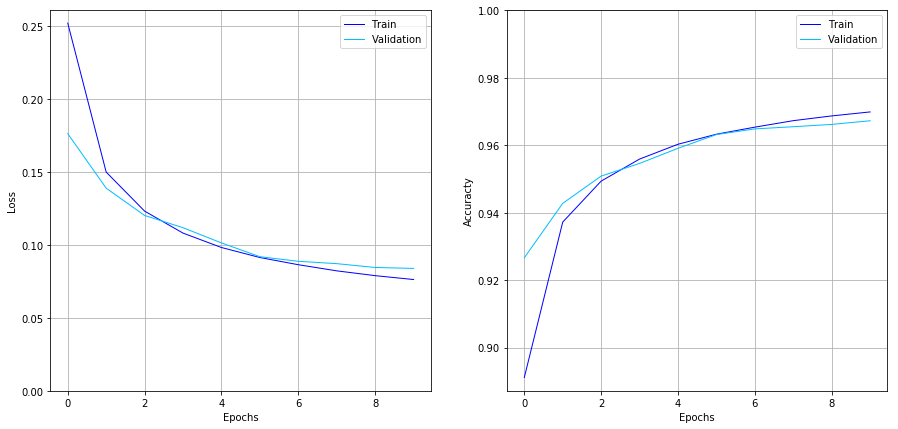

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/416/
Creating save dir
Done generating results dir Results/416/
Saving weights to Results/416/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/498

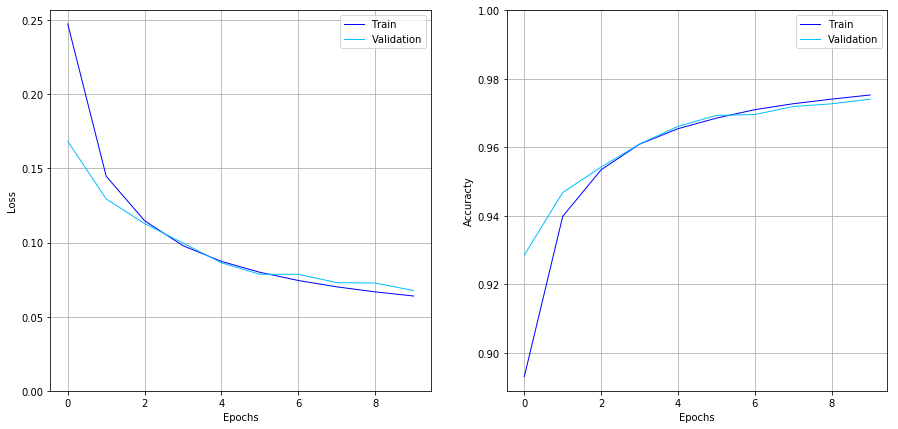

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/418/
Creating save dir
Done generating results dir Results/418/
Saving weights to Results/418/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/498

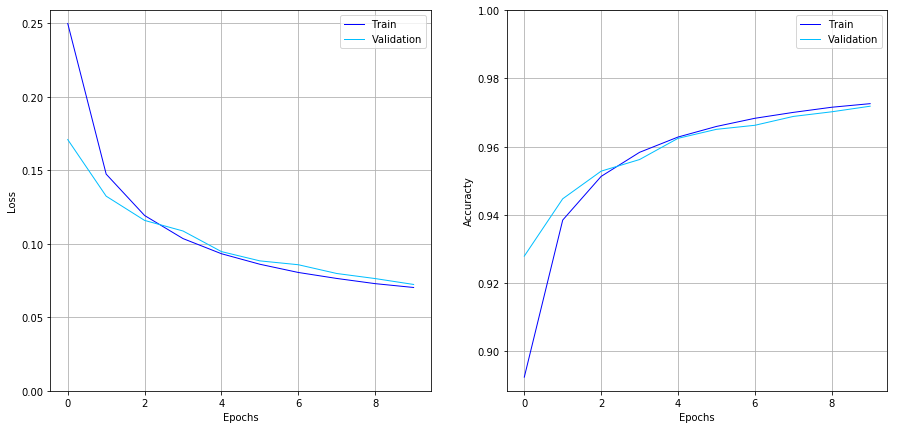

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/420/
Creating save dir
Done generating results dir Results/420/
Saving weights to Results/420/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/498

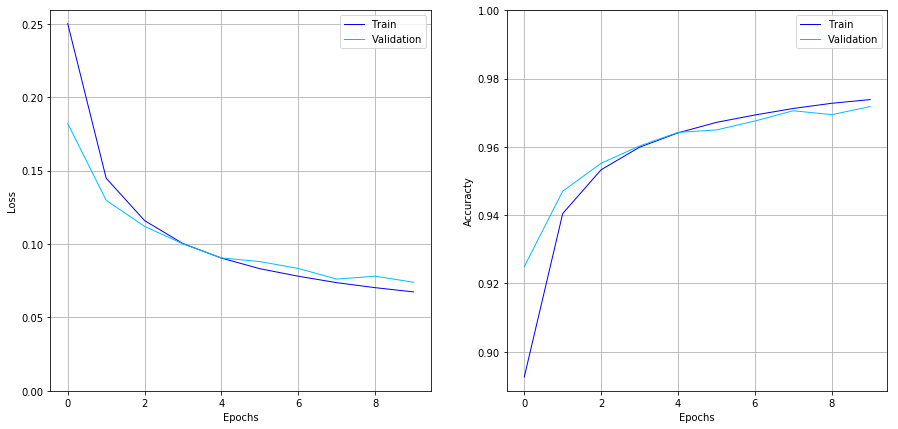

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/421/
Creating save dir
Done generating results dir Results/421/
Saving weights to Results/421/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/498

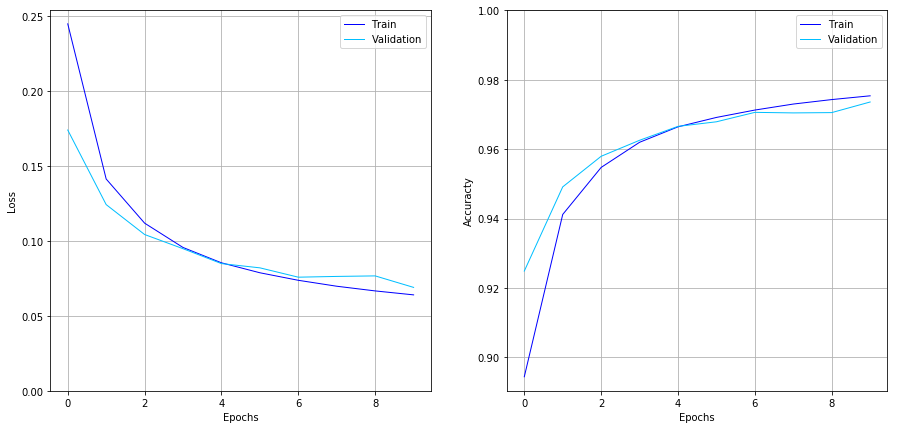

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/422/
Creating save dir
Done generating results dir Results/422/
Saving weights to Results/422/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/498

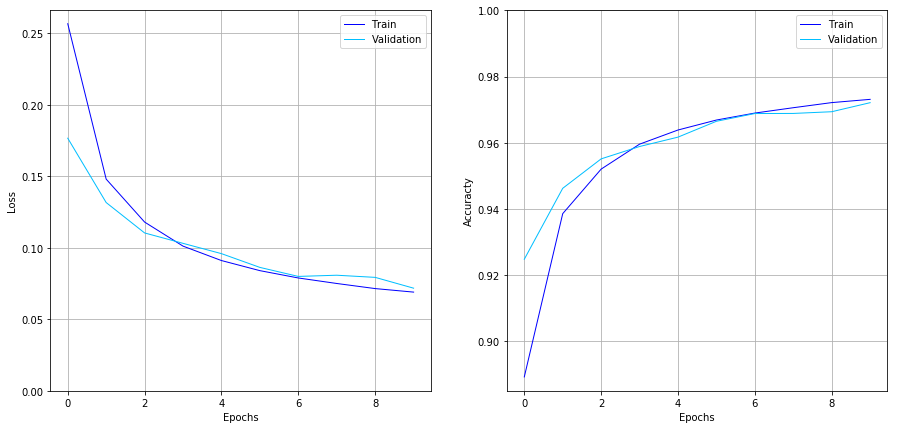

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/423/
Creating save dir
Done generating results dir Results/423/
Saving weights to Results/423/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/498

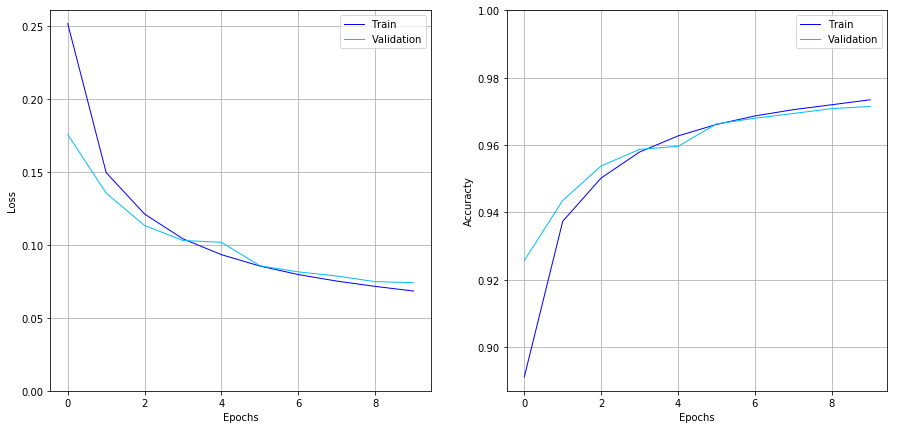

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/424/
Creating save dir
Done generating results dir Results/424/
Saving weights to Results/424/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/498

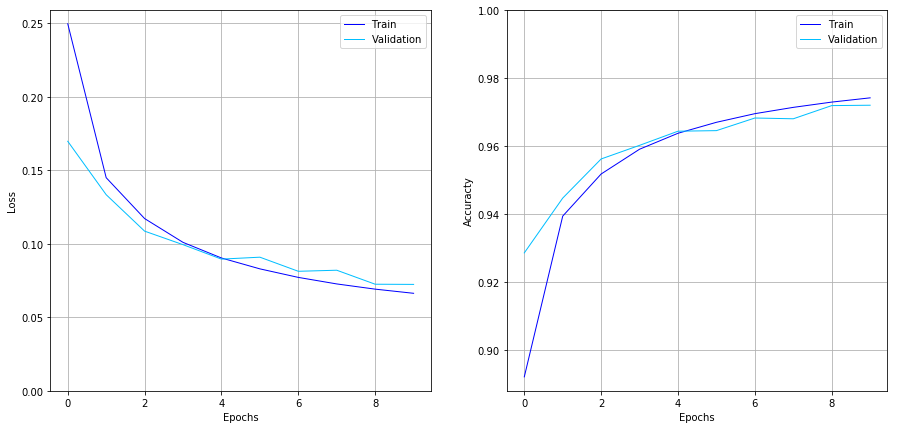

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 1 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 2: <keras.layers.convolutional.Conv2D object at 0x7fbca2d1e160>
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/425/
Creating save dir
Done generating results dir Results/425/
Saving weights to Results/425/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/498

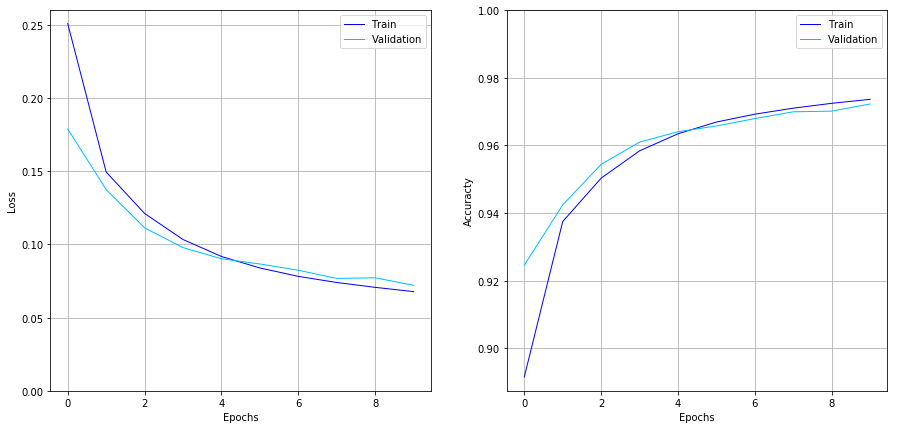

Saving summary...
Saving tensorboard logs...
All done saving stuff!
=========== At layer 2 of 8 ===========
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/426/
Creating save dir
Done generating results dir Results/426/
Saving weights to Results/426/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 180s 

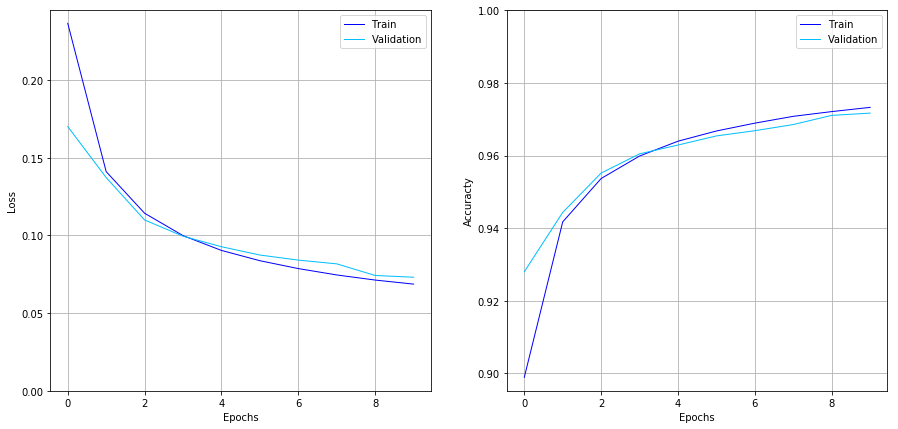

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/427/
Creating save dir
Done generating results dir Results/427/
Saving weights to Results/427/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2359 - acc: 0.8985 -

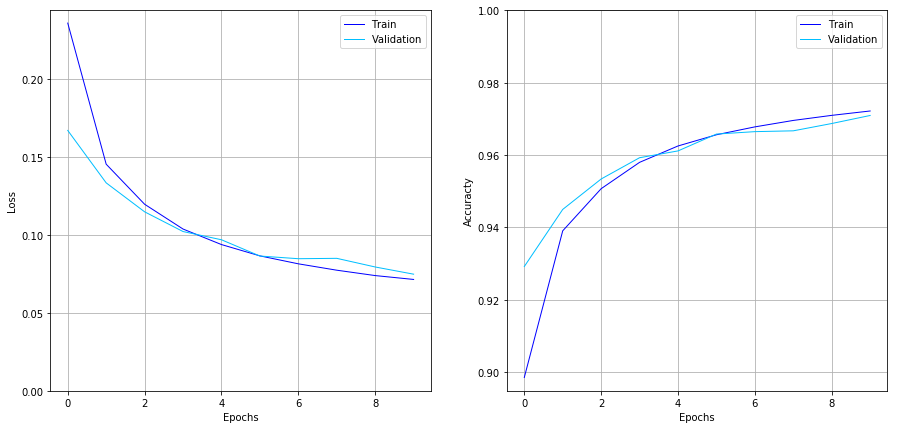

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/428/
Creating save dir
Done generating results dir Results/428/
Saving weights to Results/428/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 181s 36us/step - loss: 0.2352 - acc: 0.8991 -

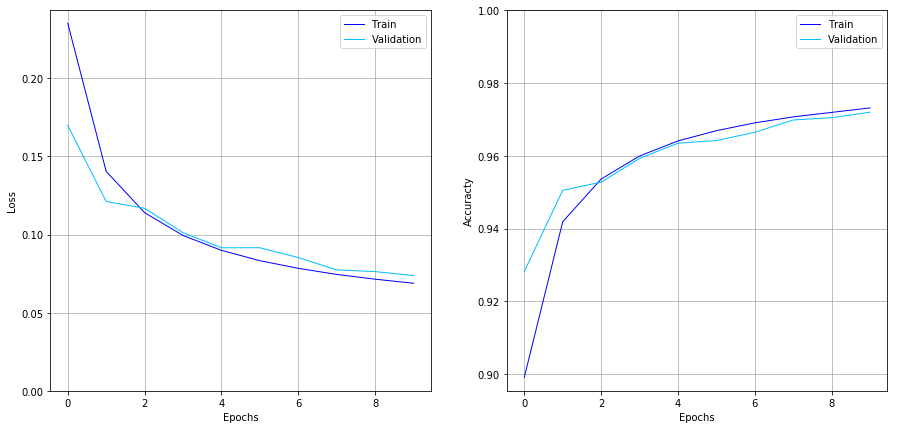

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/429/
Creating save dir
Done generating results dir Results/429/
Saving weights to Results/429/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2456 - acc: 0.8950 -

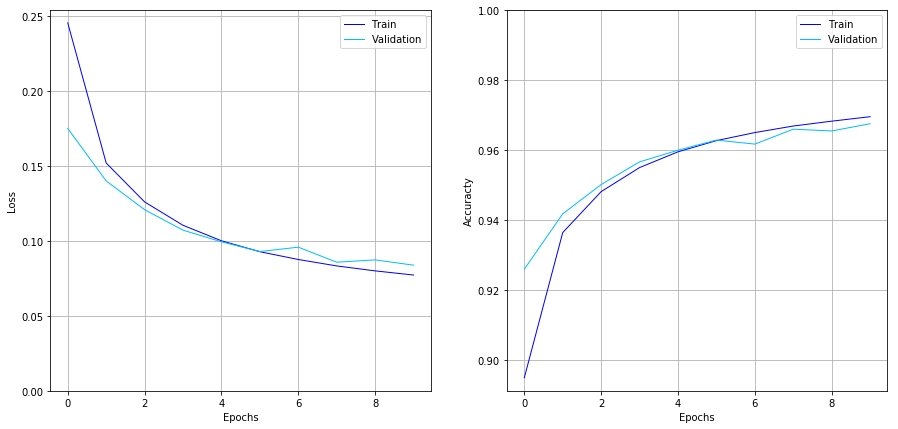

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/430/
Creating save dir
Done generating results dir Results/430/
Saving weights to Results/430/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 36us/step - loss: 0.2359 - acc: 0.8987 -

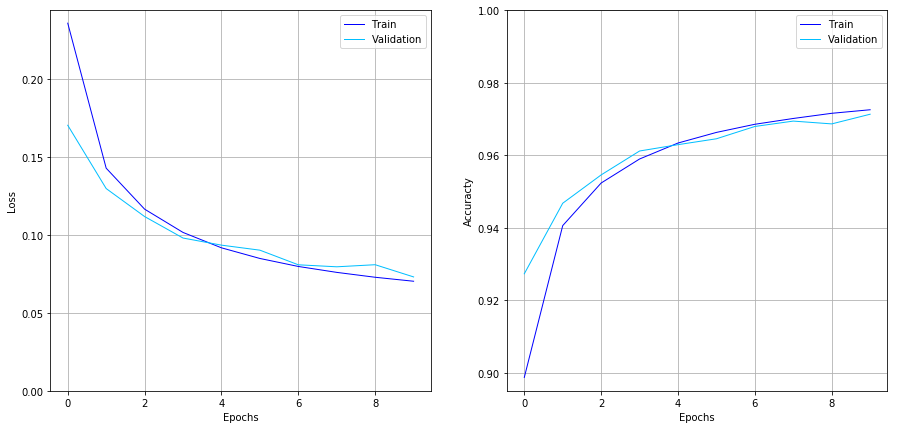

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/431/
Creating save dir
Done generating results dir Results/431/
Saving weights to Results/431/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2337 - acc: 0.8998 -

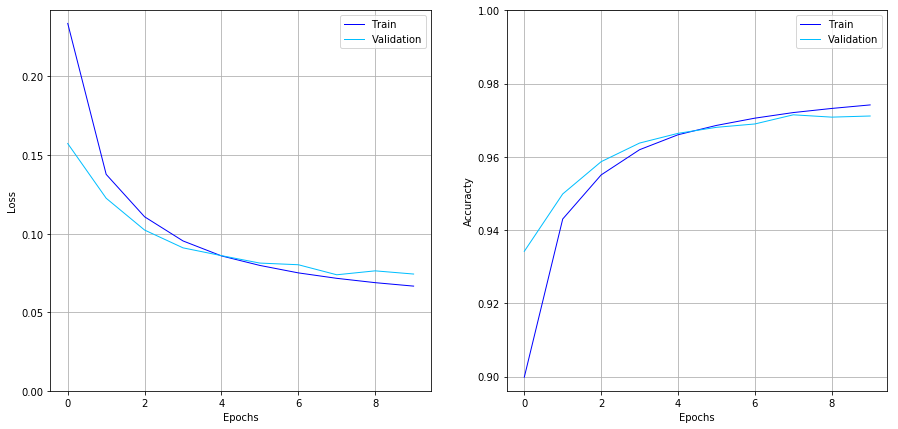

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/432/
Creating save dir
Done generating results dir Results/432/
Saving weights to Results/432/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2366 - acc: 0.8981 -

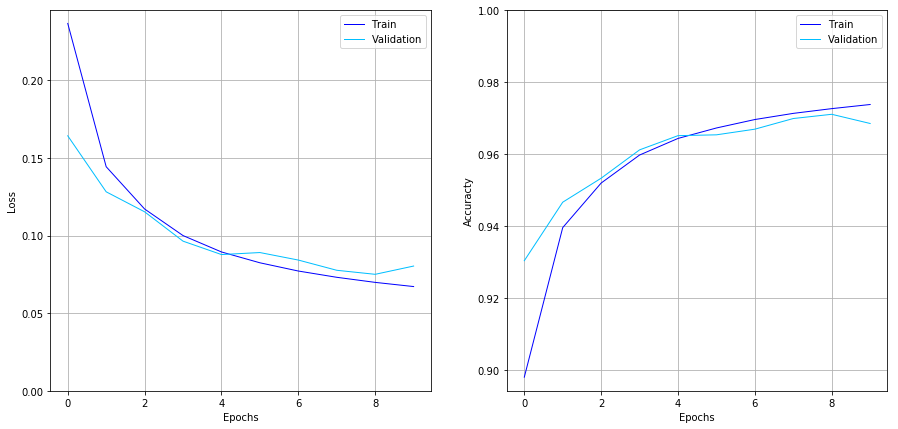

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/433/
Creating save dir
Done generating results dir Results/433/
Saving weights to Results/433/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 180s 36us/step - loss: 0.2390 - acc: 0.8978 -

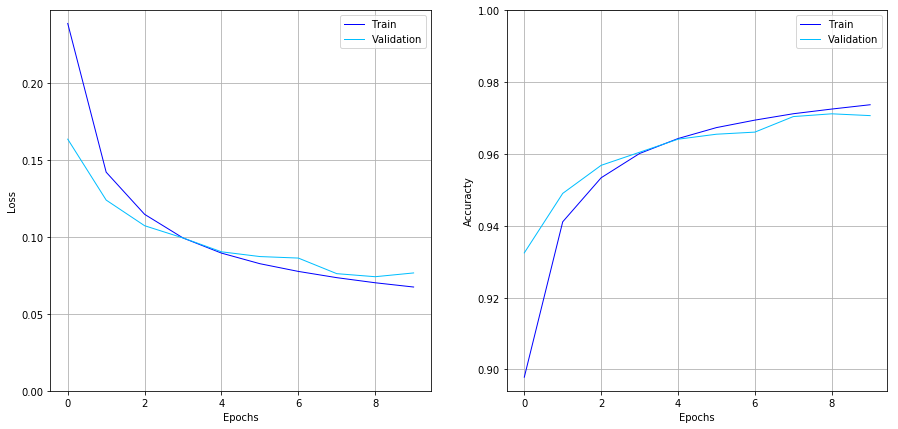

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/434/
Creating save dir
Done generating results dir Results/434/
Saving weights to Results/434/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 180s 36us/step - loss: 0.2382 - acc: 0.8978 -

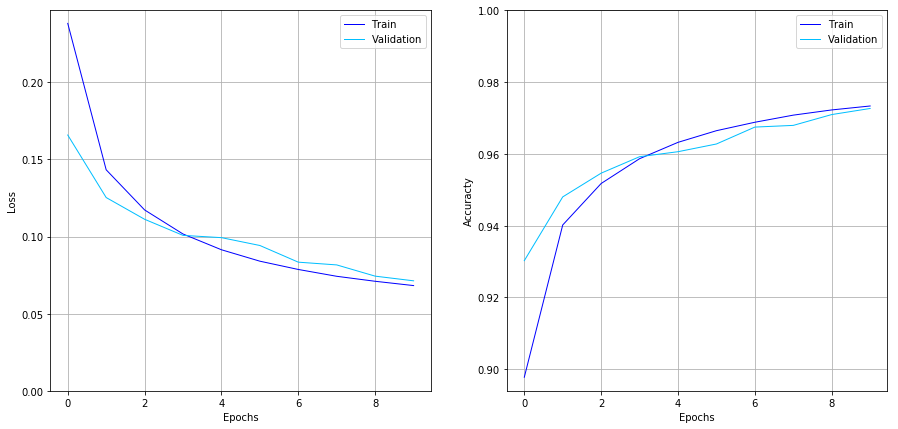

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 2 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 3: <keras.layers.convolutional.Conv2D object at 0x7fbca0047fd0>
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/435/
Creating save dir
Done generating results dir Results/435/
Saving weights to Results/435/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2379 - acc: 0.8982 -

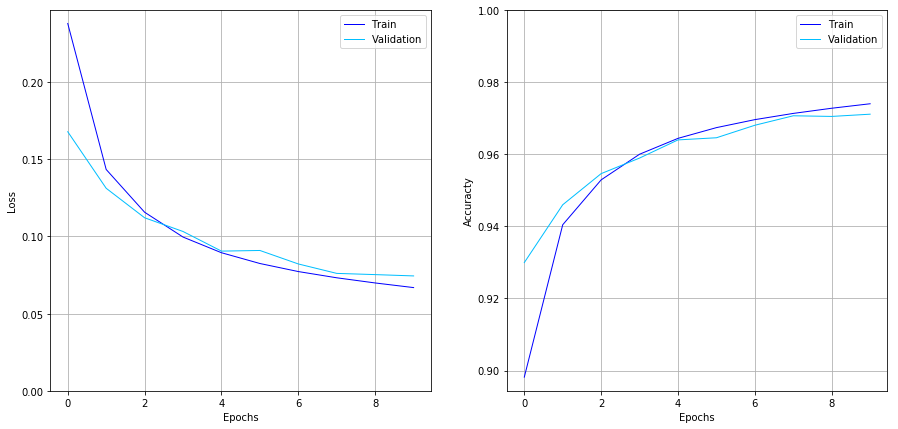

Saving summary...
Saving tensorboard logs...
All done saving stuff!
=========== At layer 3 of 8 ===========
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/436/
Creating save dir
Done generating results dir Results/436/
Saving weights to Results/436/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2251 - acc: 0.9041 - val_loss: 0.1570 - val_acc: 0.9347

Epoch 00

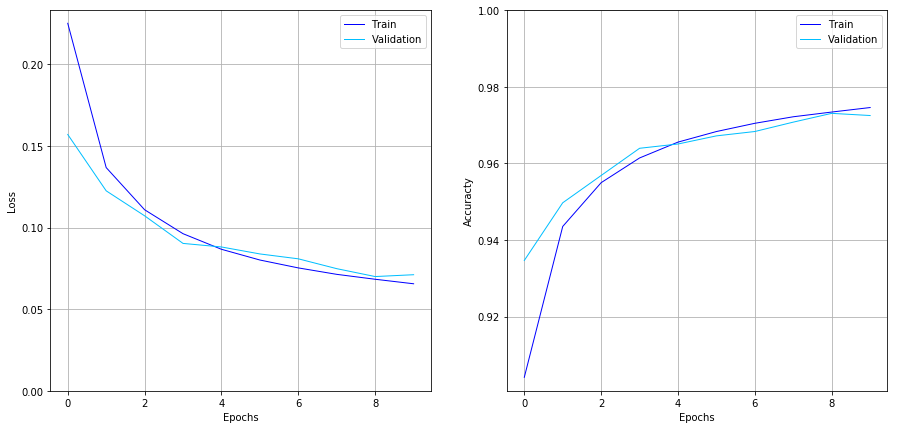

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/437/
Creating save dir
Done generating results dir Results/437/
Saving weights to Results/437/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2310 - acc: 0.9017 - val_loss: 0.1658 - val_acc: 0.9304

Epoch 00001: val_acc improved from -inf to 0.930

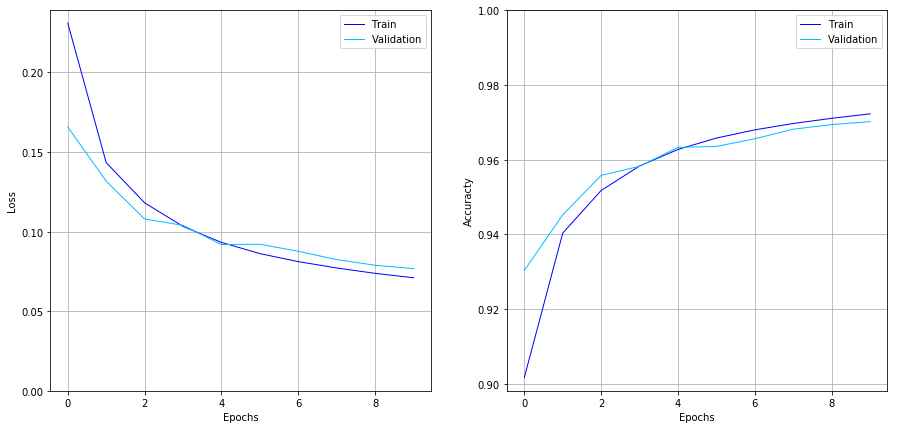

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/438/
Creating save dir
Done generating results dir Results/438/
Saving weights to Results/438/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2242 - acc: 0.9045 - val_loss: 0.1614 - val_acc: 0.9331

Epoch 00001: val_acc improved from -inf to 0.933

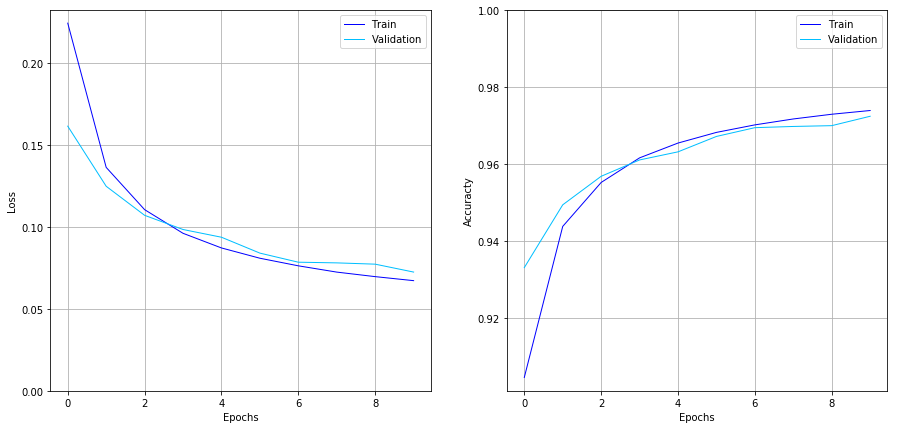

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/439/
Creating save dir
Done generating results dir Results/439/
Saving weights to Results/439/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 36us/step - loss: 0.2208 - acc: 0.9062 - val_loss: 0.1562 - val_acc: 0.9350

Epoch 00001: val_acc improved from -inf to 0.935

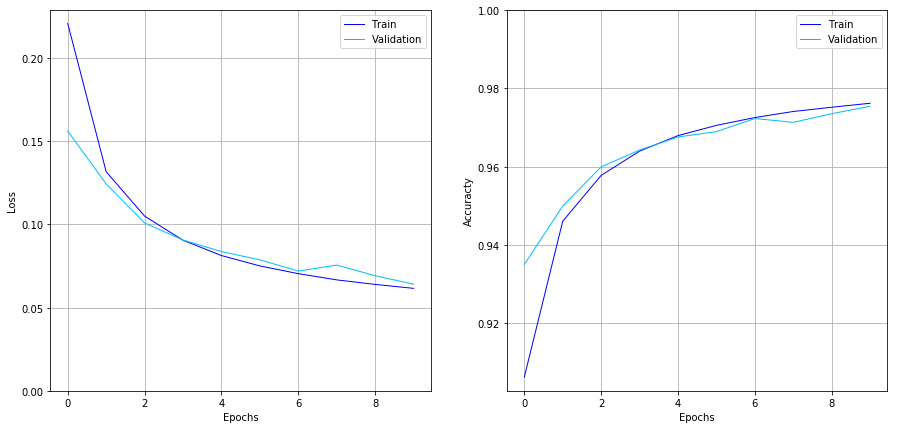

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/440/
Creating save dir
Done generating results dir Results/440/
Saving weights to Results/440/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2217 - acc: 0.9056 - val_loss: 0.1524 - val_acc: 0.9362

Epoch 00001: val_acc improved from -inf to 0.936

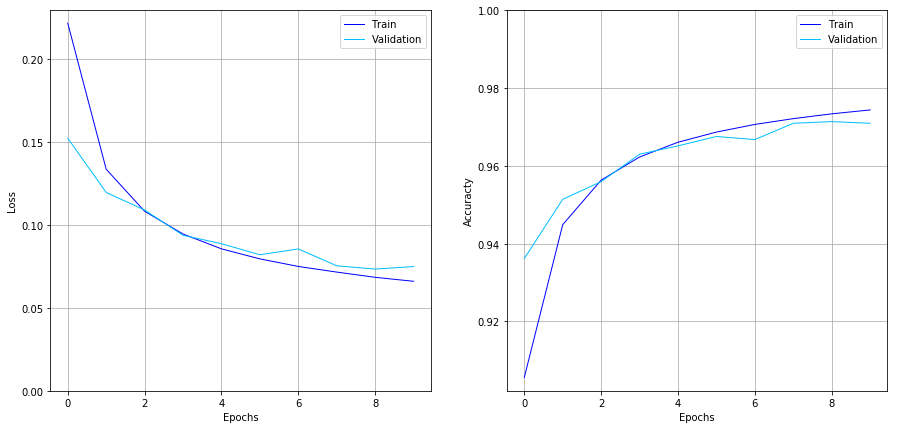

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/441/
Creating save dir
Done generating results dir Results/441/
Saving weights to Results/441/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2281 - acc: 0.9026 - val_loss: 0.1640 - val_acc: 0.9316

Epoch 00001: val_acc improved from -inf to 0.931

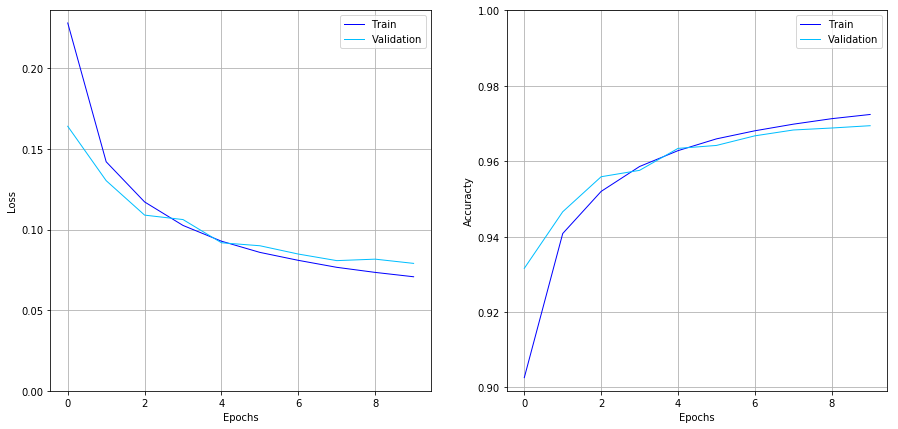

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/442/
Creating save dir
Done generating results dir Results/442/
Saving weights to Results/442/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2247 - acc: 0.9043 - val_loss: 0.1754 - val_acc: 0.9276

Epoch 00001: val_acc improved from -inf to 0.927

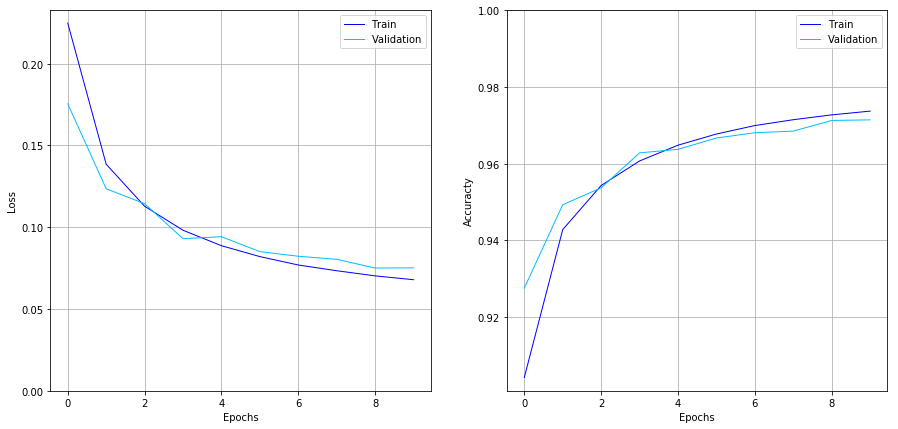

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/443/
Creating save dir
Done generating results dir Results/443/
Saving weights to Results/443/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2323 - acc: 0.9011 - val_loss: 0.1643 - val_acc: 0.9310

Epoch 00001: val_acc improved from -inf to 0.930

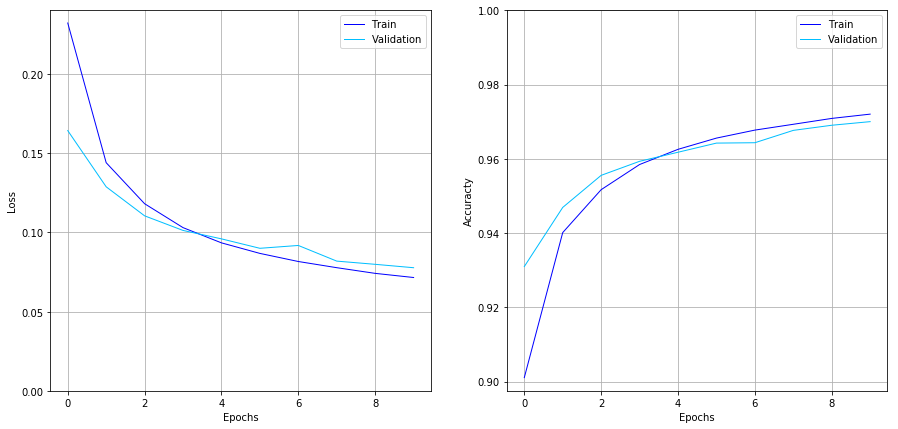

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/444/
Creating save dir
Done generating results dir Results/444/
Saving weights to Results/444/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 183s 37us/step - loss: 0.2245 - acc: 0.9044 - val_loss: 0.1563 - val_acc: 0.9350

Epoch 00001: val_acc improved from -inf to 0.935

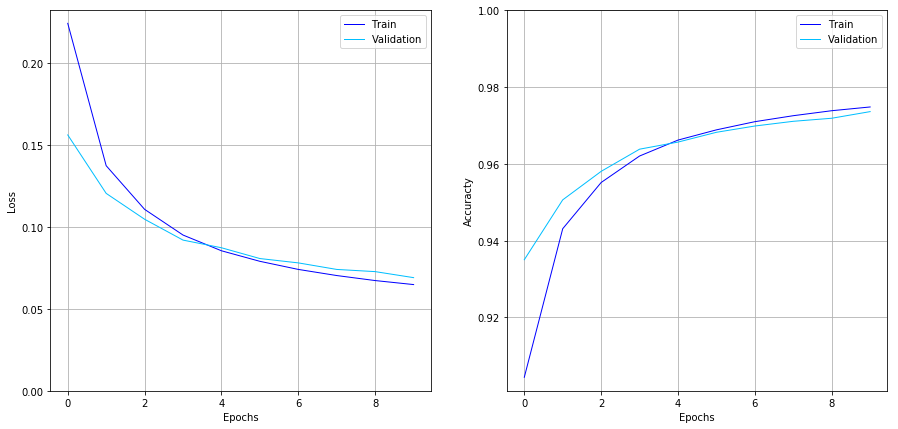

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 3 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 4: <keras.layers.convolutional.Conv2D object at 0x7fbca00442e8>
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/445/
Creating save dir
Done generating results dir Results/445/
Saving weights to Results/445/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 180s 36us/step - loss: 0.2245 - acc: 0.9043 - val_loss: 0.1591 - val_acc: 0.9336

Epoch 00001: val_acc improved from -inf to 0.933

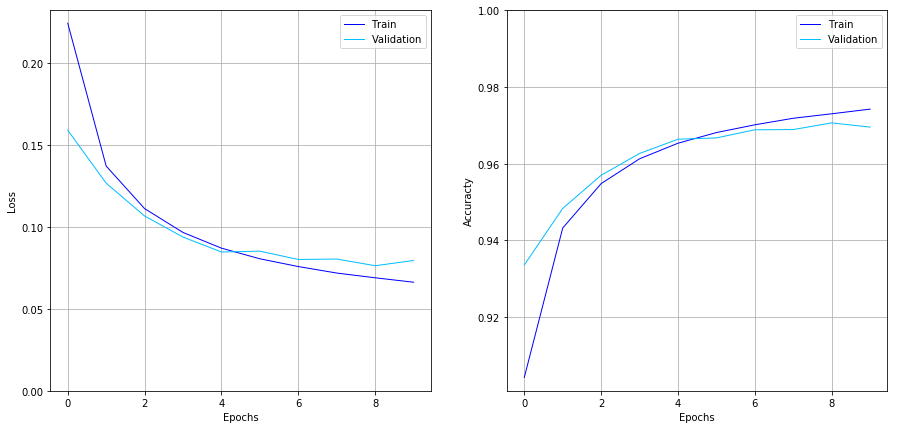

Saving summary...
Saving tensorboard logs...
All done saving stuff!
=========== At layer 4 of 8 ===========
Loading first 4 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/446/
Creating save dir
Done generating results dir Results/446/
Saving weights to Results/446/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 180s 36us/step - loss: 0.2198 - acc: 0.9068 - val_loss: 0.1617 - val_acc: 0.9324

Epoch 00001: val_acc improved from -inf to 0.93243, saving model to Results/446/weightsCheckp

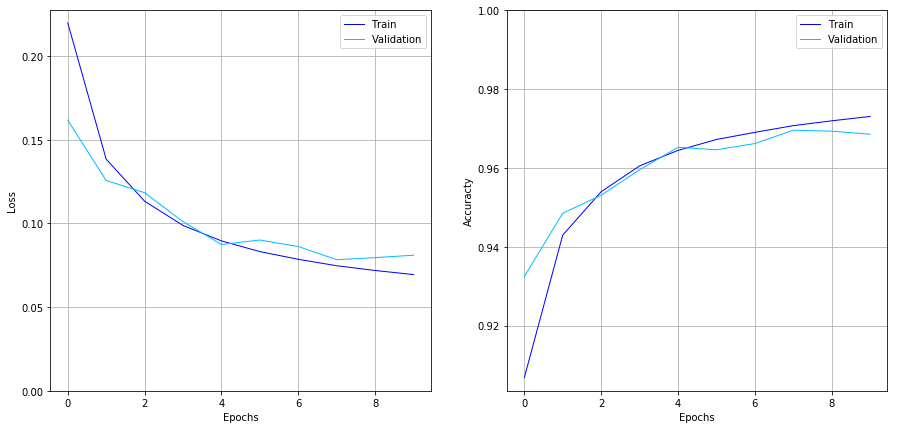

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 4 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/447/
Creating save dir
Done generating results dir Results/447/
Saving weights to Results/447/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 180s 36us/step - loss: 0.2149 - acc: 0.9089 - val_loss: 0.1529 - val_acc: 0.9363

Epoch 00001: val_acc improved from -inf to 0.93633, saving model to Results/447/weightsCheckpoints/weights-checkp-001-0.936.hdf5
Epoc

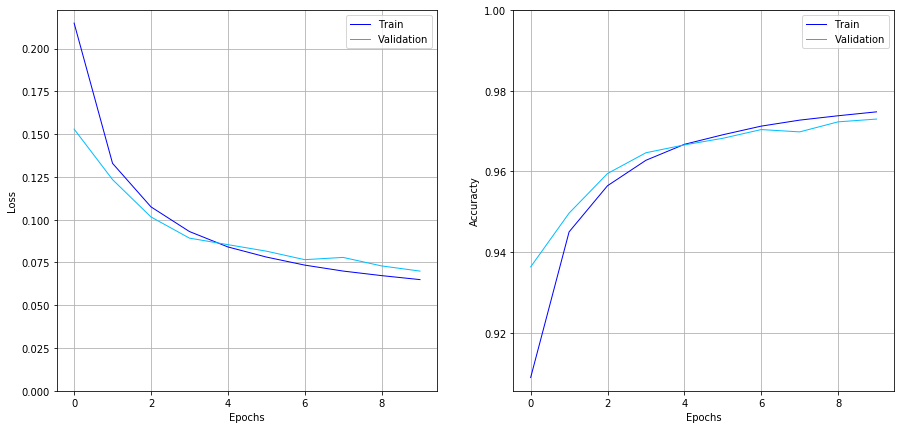

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 4 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/448/
Creating save dir
Done generating results dir Results/448/
Saving weights to Results/448/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 180s 36us/step - loss: 0.2136 - acc: 0.9095 - val_loss: 0.1512 - val_acc: 0.9373

Epoch 00001: val_acc improved from -inf to 0.93730, saving model to Results/448/weightsCheckpoints/weights-checkp-001-0.937.hdf5
Epoc

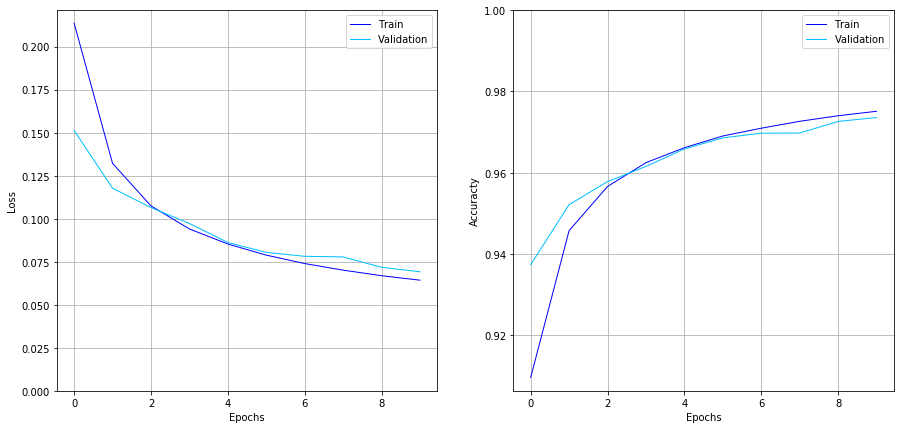

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 4 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/449/
Creating save dir
Done generating results dir Results/449/
Saving weights to Results/449/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 180s 36us/step - loss: 0.2168 - acc: 0.9078 - val_loss: 0.1561 - val_acc: 0.9349

Epoch 00001: val_acc improved from -inf to 0.93490, saving model to Results/449/weightsCheckpoints/weights-checkp-001-0.935.hdf5
Epoc

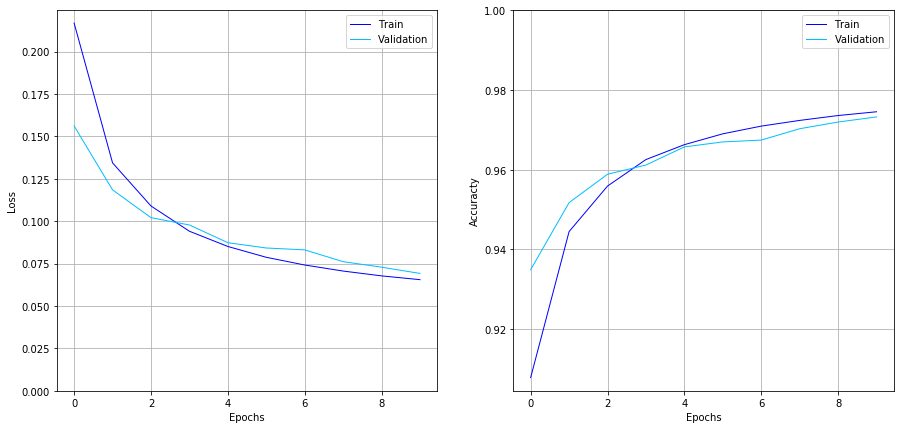

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 4 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/450/
Creating save dir
Done generating results dir Results/450/
Saving weights to Results/450/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 36us/step - loss: 0.2160 - acc: 0.9083 - val_loss: 0.1524 - val_acc: 0.9363

Epoch 00001: val_acc improved from -inf to 0.93635, saving model to Results/450/weightsCheckpoints/weights-checkp-001-0.936.hdf5
Epoc

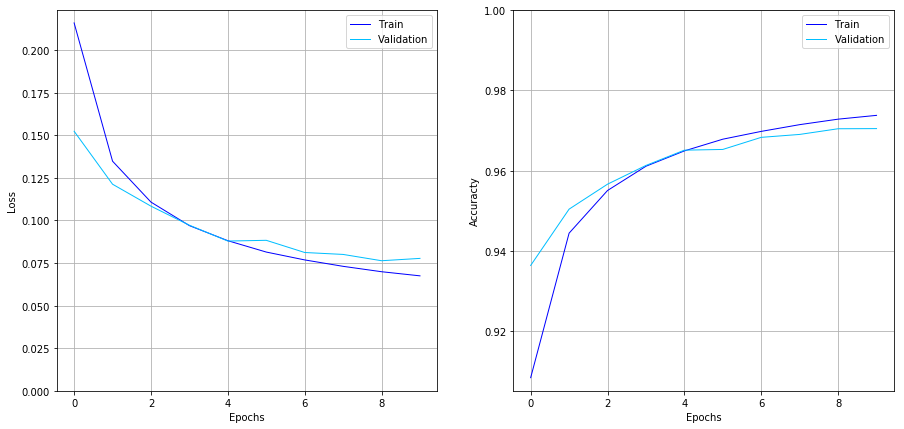

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 4 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/451/
Creating save dir
Done generating results dir Results/451/
Saving weights to Results/451/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2167 - acc: 0.9079 - val_loss: 0.1527 - val_acc: 0.9368

Epoch 00001: val_acc improved from -inf to 0.93684, saving model to Results/451/weightsCheckpoints/weights-checkp-001-0.937.hdf5
Epoc

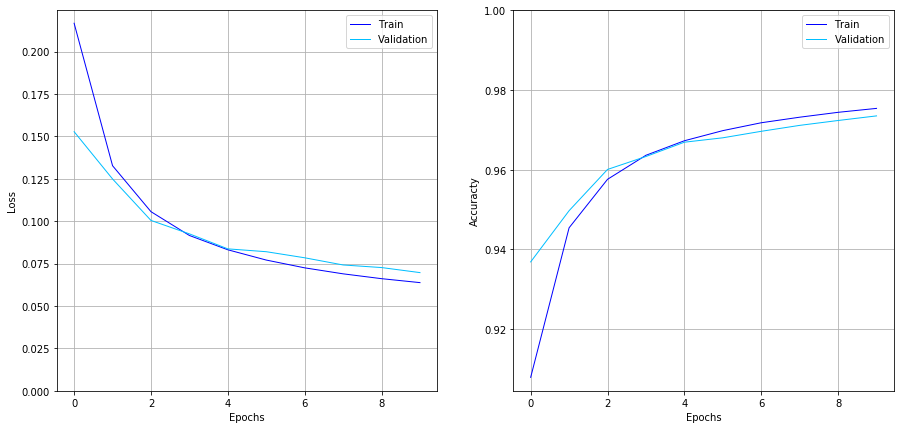

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 4 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/452/
Creating save dir
Done generating results dir Results/452/
Saving weights to Results/452/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
4982178/4982178 [==============================] - 182s 37us/step - loss: 0.2155 - acc: 0.9085 - val_loss: 0.1472 - val_acc: 0.9386

Epoch 00001: val_acc improved from -inf to 0.93858, saving model to Results/452/weightsCheckpoints/weights-checkp-001-0.939.hdf5
Epoc

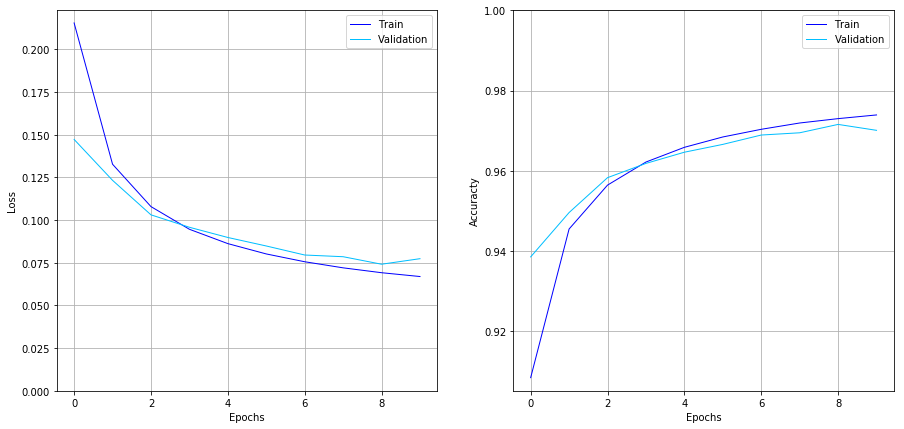

Saving summary...
Saving tensorboard logs...
All done saving stuff!
Loading first 4 layers from results Results/103/weights.hdf5, 
- Resetting layer nr 5: <keras.layers.convolutional.Conv2D object at 0x7fbca0061048>
- Resetting layer nr 6: <keras.layers.convolutional.Conv2D object at 0x7fbca0076128>
- Resetting layer nr 7: <keras.layers.convolutional.Conv2D object at 0x7fbca020c4a8>
- Skipping layer nr 8: <keras.layers.core.Flatten object at 0x7fbca023f128>
- Resetting layer nr 9: <keras.layers.core.Dense object at 0x7fbca023f1d0>
Save dir: Results/453/
Creating save dir
Done generating results dir Results/453/
Saving weights to Results/453/weightsCheckpoints/
Train on 4982178 samples, validate on 2453910 samples
Epoch 1/10
2939136/4982178 [================>.............] - ETA: 1:05 - loss: 0.2488 - acc: 0.8938

KeyboardInterrupt: 

In [11]:
# 3n4 Freeze and average
%run -i 'arena.py'

# Parameters
sourceNet = '103' # trained on 3pc from scratch
# sourceNet = '107' # trained on 4pc from scratch
freeze = True
resSaveFile = '3n4freeze'
epochs = 10
averageOver = 10
expDescr = "Bengio 3n4 - freeze = {} - average over {} runs".format(str(freeze), averageOver)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = True # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
resSaveFile = resSaveFile + '-{} run average'.format(averageOver)
fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False
saveDir = 'bengioResults'

X_train, X_test, y_train, y_test = loadData()
model, nnStr = createModel()
results = []
accumulatedScore = 0
layersCount = len(model.layers)

for copyFirstNLayers in range(layersCount + 1):
    print('=========== At layer {} of {} ==========='.format(copyFirstNLayers, layersCount - 1))
    if copyFirstNLayers != layersCount - 1:
        accumulatedScore = 0
        for a in range(averageOver):
            model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

            if saveEveryRun:
                resID = genNextResultsDir(model)
                #add freeze and some tl parameters to save dir

            # train
            fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

            # score and save accuracy
            score = calcScore(model)
            if saveEveryRun:
                saveTrainResults(resID, model, logDir, score, copyFirstNLayers, freeze)
            
            # update Return
            accumulatedScore += score[1]
        results.append(accumulatedScore/averageOver)

        # save results incrementally to txt file
        save_obj(saveDir, resSaveFile, results)
        with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
            file.write(str(results))
            
        # to load:
        # results = load_obj('temp','3n4.txt')
print('\n Final Results: {}'.format(results))

In [ ]:
# 4n4 Freeze and average
%run -i 'arena.py'

# Parameters
# sourceNet = '103' # trained on 3pc from scratch
sourceNet = '107' # trained on 4pc from scratch
freeze = True
resSaveFile = '4n4freeze'
epochs = 10
averageOver = 10
expDescr = "Bengio 4n4 - freeze = {} - average over {} runs".format(str(freeze), averageOver)

saveEveryRun = True # save stuff in results dir
saveWeightsCheckpoints = True # save chkp in results dit
saveTensorboardLogs = True # save logs in ./logs dir
resSaveFile = resSaveFile + '-{} run average'.format(averageOver)
fractionOfDataToUse = 1
plotDuringTraining = False
loadWeights = False 
askForConfirmation = False
saveDir = 'bengioResults'

X_train, X_test, y_train, y_test = loadData()
model, nnStr = createModel()
results = []
accumulatedScore = 0
layersCount = len(model.layers)

for copyFirstNLayers in range(layersCount + 1):
    print('=========== At layer {} of {} ==========='.format(copyFirstNLayers, layersCount - 1))
    if copyFirstNLayers != layersCount - 1:
        accumulatedScore = 0
        for a in range(averageOver):
            model = loadNFirstLayers(model, sourceNet, copyFirstNLayers , freeze)

            if saveEveryRun:
                resID = genNextResultsDir(model)
                #add freeze and some tl parameters to save dir

            # train
            fitHistory, logDir = trainModel(resID, model, saveWeightsCheckpoints, saveTensorboardLogs)

            # score and save accuracy
            score = calcScore(model)
            if saveEveryRun:
                saveTrainResults(resID, model, logDir, score, copyFirstNLayers)
            
            # update Return
            accumulatedScore += score[1]
        results.append(accumulatedScore/averageOver)

        # save results incrementally to txt file
        save_obj(saveDir, resSaveFile, results)
        with open(saveDir + '/' + str(resSaveFile) + '.txt','w') as file:
            file.write(str(results))
            
        # to load:
        # results = load_obj('temp','3n4.txt')
print('\n Final Results: {}'.format(results))